   Network Size  Run Index  Test   Name   Succ  Fail  Send Rate Max Latency  \
0             1          0     1   5TPS   5000     0        5.0      0.32 s   
1             1          1     1   5TPS   5000     0        5.0      0.43 s   
2             1          0     1  10TPS   9700   320       10.0      0.87 s   
3             1          1     1  10TPS   8040  1960       10.0      0.47 s   
4             1          0     1  15TPS  13940  1060       15.0      0.97 s   

  Min Latency Avg Latency  Throughput  Stale Block Rate  
0      0.01 s      0.03 s         5.0               0.0  
1      0.01 s      0.05 s         5.0               0.0  
2      0.01 s      0.08 s         9.7               0.0  
3      0.01 s      0.05 s         9.6               0.0  
4      0.01 s      0.07 s        14.0               0.0  
int64
int64


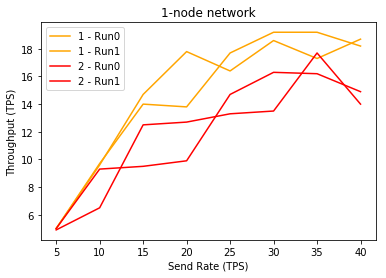

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import os

# On the Linux machine:\n",
#RESULTSDIR = "/home/amie/caliper/experiments/poet_intkey_1.0/results/"
# On MacOS
#RESULTSDIR = "/Users/amiecorso/caliper/experiments/poet_intkey_1.0/results/"
#RESULTSDIR = "/Users/amiecorso/caliper/experiments/arch_exps/poet_intkey_1.0-124-fixed-feedback40tps-1/results/"
DATA = "/Users/amiecorso/caliper/experiments/arch_exps/poet_intkey_1.0-12-gradient5-40unfinished5/results/performance_summary.csv"
df = pd.read_csv(DATA)

# cut off \"tps\" & make numeric
df['Send Rate'] = pd.to_numeric(df['Send Rate'].apply(lambda x: x.split(' ')[0]))
df['Throughput'] = pd.to_numeric(df['Throughput'].apply(lambda x: x.split(' ')[0]))
print(df.head(5))
print(df['Network Size'].dtype)
print(df['Run Index'].dtype)

df1 = df[df['Network Size'] == 1]
df2 = df[df['Network Size'] == 2]
df1_0 = df1[df1['Run Index'] == 0]
df1_1 = df1[df1['Run Index'] == 1]
df2_0 = df2[df2['Run Index'] == 0]
df2_1 = df2[df2['Run Index'] == 1]


ax = df1_0.plot(x="Send Rate", y="Throughput", label="1 - Run0", title=str(1) + "-node network", color='orange')
df1_1.plot(x="Send Rate", y="Throughput", ax=ax, label="1 - Run1", title=str(1) + "-node network", color='orange')
df2_0.plot(x="Send Rate", y="Throughput", ax=ax, label="2 - Run0", title=str(1) + "-node network", color='r')
df2_1.plot(x="Send Rate", y="Throughput", ax=ax, label="2 - Run1", title=str(1) + "-node network", color='r')
ax.set(xlabel="Send Rate (TPS)", ylabel="Throughput (TPS)")
#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
